# Project 2.5

## Introduction

Project 2.5 picks up where Project 2 left off.  Recall that in Project 2, were exploring logistic regression by using an example from 
the TV show *The Good Place*.  The show is centered around a number of humans who have died and find themselves in the afterlife.  In this conception
of the afterlife, humans are sent to "the Good Place" or "the Bad Place" after death.  All humans are assigned a numerical score based on the morality of their conduct in life, and only those with the very highest scores are sent to the "Good Place", where they enjoy eternal happiness; all others experience an eternity of torture in the "Bad Place."

In Project 2.5, we expand the concepts of the good place and the bad place to also include the "medium place," and we will attempt to classify which 
of these three places someone will end up in the TV-show-afterlife.  We will use **multinomial logistic regression** for this.  

***You will probably want to refresh your memory by re-reading the logistic-regression-3 notebook, which covers multinomial linear regression.***

***We also make one slight change in this project: we use 0-based class indexing, rather than 1-based.  So our 3 classes are 0/1/2, not 1/2/3. We
do this so they match up with the array indices in Python.***

As before, we have data for 1000 people about how often they:

- Let someone merge in front of them in traffic
- Didn't tip their server at a restaurant
- Held a door open for someone who was walking behind them
- Littered

These will be our four features for the problem.  Our data set consists of these four features tallied for 1000 different people.

To complete this project, you will write Python code in places marked
`# YOUR CODE HERE`.  There are also code cells in this notebook you must run
to produce various kinds of plots and graphs.  There are also a number of cells
marked with `# YOUR ANSWER HERE` where you will answer questions.


In [2]:
# FILL THIS IN:

# Name: Chris Hoang
# Honor pledge: I completed this project by myself



In [3]:
# Set up libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
# Read data

# Write code below to read the CSV file "data2.csv" and put it into a
# Pandas dataframe called `df`:


# YOUR CODE HERE
df = pd.read_csv('data2.csv')

## Explanation of the data file

Each row of the file represents data about a person.  

The first four columns should be self-explanatory: they tell how often a person did a
certain activity (explained above).  

There is now a new column at the end called `noisygoodmedbed` which tells which of the three places
(good/medium/bad) the person ends up in.  The "noisy" part is because some of the data has been altered to be a little less "perfect."

In [5]:
# Display the first few and last few lines of this data:

print(len(df)) # Should be 1000
df  # Verify this looks ok

1000


,letMerge,noTip,heldDoor,littered,goodbad,noisygoodbad,noisygoodmedbad
0,13,0,102,7,good,good,medium
1,24,40,295,224,bad,bad,bad
2,42,8,356,182,bad,good,medium
3,194,20,485,193,good,good,medium
4,196,24,376,175,good,good,medium
...,...,...,...,...,...,...,...
995,37,3,150,137,bad,bad,medium
996,15,17,439,234,bad,bad,bad
997,67,22,480,113,good,good,medium
998,57,20,470,54,good,good,good


In [6]:
# Select our X and y data

# First, we will split the data frame above into a four-column frame
# with the input features (X's) and a one-column frame with the target
# feature (y), which we will use the noisy column (noisygoodmedbad).

# Write code below to create df_X with just the four X feature columns,
# and df_y that has just the noisygoodbad column.

# Then **normalize** the X values with Z-score normalization as in 
# project 1.

# YOUR CODE HERE
df_X = df[['letMerge', 'noTip', 'heldDoor', 'littered']]
df_y = df['noisygoodmedbad']

sigma = pd.DataFrame.std(df_X)
mean = pd.DataFrame.mean(df_X)
df_X = (df_X - mean) / sigma

In [7]:
# Sanity check for df_X

df_X  # Should print a data frame with 1000 rows and 4 columns.
# First row should be [ -1.161413 -1.267048 -1.350553 -1.620752]

,letMerge,noTip,heldDoor,littered
0,-1.161413,-1.267048,-1.350553,-1.620752
1,-0.989370,2.629464,0.136883,1.396890
2,-0.707846,-0.487746,0.607005,0.812830
3,1.669471,0.681208,1.601198,0.965798
4,1.700751,1.070859,0.761143,0.715487
...,...,...,...,...
995,-0.786047,-0.974810,-0.980621,0.187052
996,-1.130132,0.388969,1.246679,1.535952
997,-0.316840,0.876033,1.562663,-0.146696
998,-0.473242,0.681208,1.485594,-0.967161


In [8]:
# Sanity check for df_y

df_y  # Should be a column of goods, mediums, and bads, starting with medium, bad, medium, medium, medium,
# and ending with medium, bad, medium, good, good.

0      medium
1         bad
2      medium
3      medium
4      medium
        ...  
995    medium
996       bad
997    medium
998      good
999      good
Name: noisygoodmedbad, Length: 1000, dtype: object

In [9]:
# Now we need to switch df_y to not have good/medium/bad strings, but rather 0/1/2's.
# Use this piece of code:

df_y, y_cats = pd.factorize(pd.Categorical(df_y, categories=['bad', 'medium', 'good'], ordered=True),sort=True)

print("Categories=", y_cats)
print("New df_y=", df_y)

# This changes df_y so 0 represents bad, 1 represents medium, and 2 represents good.

Categories= ['bad', 'medium', 'good']
Categories (3, object): ['bad' < 'medium' < 'good']
New df_y= [1 0 1 1 1 1 2 2 2 0 1 0 1 1 0 0 1 0 0 1 1 1 2 2 1 2 1 0 0 1 1 0 1 2 0 0 2
 2 2 1 1 0 0 1 1 0 2 0 1 1 2 2 2 1 1 0 1 1 2 1 2 1 1 2 1 0 0 1 2 2 2 1 1 1
 2 0 2 2 0 1 2 1 0 2 0 1 1 0 2 1 1 2 2 2 0 0 0 1 1 0 1 1 1 1 1 1 1 2 0 2 1
 2 1 1 0 0 0 1 1 2 1 1 2 1 2 1 0 1 0 1 2 2 2 1 1 0 2 2 1 0 1 1 2 0 1 1 1 2
 1 1 0 1 1 1 2 1 2 2 1 1 1 1 0 2 2 1 1 1 0 1 1 2 0 0 2 0 2 2 2 1 2 2 0 1 0
 1 2 0 1 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 2 2 1 1
 2 2 2 1 1 1 2 1 2 2 2 0 1 0 1 2 0 2 1 1 2 0 2 1 0 2 1 1 1 1 0 1 2 1 0 1 2
 1 0 1 1 2 2 0 1 0 0 2 2 2 2 1 1 1 2 2 2 1 2 0 1 2 0 2 1 2 1 2 1 2 0 2 1 0
 2 2 1 2 2 2 0 0 1 1 1 1 1 1 2 0 2 2 0 2 1 1 1 2 2 1 1 1 1 1 2 1 2 2 1 0 1
 1 2 1 1 1 1 2 1 2 0 1 0 1 1 2 1 0 1 1 1 2 1 2 0 1 1 0 1 2 2 1 1 2 1 0 1 0
 1 1 0 1 2 2 2 1 1 1 1 1 1 0 2 1 0 0 0 2 0 1 2 0 1 1 2 0 2 2 1 1 2 2 2 1 1
 0 1 1 0 1 0 1 2 2 1 1 2 2 0 1 1 1 0 1 2 1 1 2 0 0 1 0 0 1 2 0 1 2 1 1 2 0


In [10]:
# One-hot vectors

# Run this cell to convert df_y to one-hot vectors.

df_y_one_hot = pd.get_dummies(df_y).to_numpy()

print(df_y[0:10])  # should print [1 0 1 1 1 1 2 2 2 0]
print(df_y_one_hot[0:10])  # should print 10 one-hot vectors correspoding to the 10 values above.

[1 0 1 1 1 1 2 2 2 0]
[[0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [11]:
# Sanity check shapes:

print(df_X.shape) # Should be (1000, 4)
print(df_y.shape) # Should be (1000,)
print(df_y_one_hot.shape) # Should be (1000, 3)

(1000, 4)
(1000,)
(1000, 3)


In [12]:
# Split the data into training and testing.

# We want to write code to split the data frames above into a few
# new data frames.  In particular, are going to have a TRAINING SET
# and a TESTING SET for this project.  We will use 80% of the data for 
# training, and the remaining 20% for testing.  

# In the real world, we would split the data randomly, but so we all
# end up with the same results, we will use the first 80% of the data
# for training, and the last 20% for testing (in order of how the rows
# show up in the file).  Note that there are 1000 people (rows in 
# the file), so the first 800 rows will be training, and the last 200
# will be testing.

# Write code here to create SIX NUMPY ndarrays:

# - X_train: first 800 lines of df_X
# - X_test: last 200 lines of df_X
# - y_train: first 800 lines of df_y
# - y_test: last 200 lines of df_y
# - y_train: first 800 lines of df_y_one_hot
# - y_test: last 200 lines of df_y_one_hot

# Then, add a column of ones to the left side of X_train and X_test.

# YOUR CODE HERE
X_train = df_X.iloc[:800].to_numpy()
X_test = df_X.iloc[800:].to_numpy()
y_train = df_y[:800]
y_test = df_y[800:]
y_train_one_hot = df_y_one_hot[:800]
y_test_one_hot = df_y_one_hot[800:]

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))



In [13]:
# Sanity checks:

print(X_train.shape) # Should be (800, 5)
print(y_train.shape) # Should be (800,) 
print(y_train_one_hot.shape) # Should be (800, 3) 
print(X_test.shape) # Should be (200, 5)
print(y_test.shape) # Should be (200,) 
print(y_test_one_hot.shape) # Should be (200, 3) 


(800, 5)
(800,)
(800, 3)
(200, 5)
(200,)
(200, 3)


In [14]:
# Show first few rows of training/testing data:  (will be useful to have these later)

print("First 10 training examples:")
print(np.hstack([X_train, y_train.reshape(-1, 1)])[0:10])
print()
print("First 10 testing examples:")
print(np.hstack([X_test, y_test.reshape(-1, 1)])[0:10])

First 10 training examples:
[[ 1.         -1.16141295 -1.26704849 -1.35055312 -1.62075162  1.        ]
 [ 1.         -0.98937031  2.62946412  0.13688262  1.3968899   0.        ]
 [ 1.         -0.70784599 -0.48774597  0.6070048   0.81283025  1.        ]
 [ 1.          1.66947051  0.68120782  1.6011976   0.96579826  1.        ]
 [ 1.          1.70075099  1.07085908  0.76114322  0.71548698  1.        ]
 [ 1.          0.74669634  0.77862063 -0.31782571  0.24267678  1.        ]
 [ 1.          0.60593418 -0.97481004  0.76114322 -1.28700325  2.        ]
 [ 1.         -0.86424839 -1.26704849  1.06942006 -0.78638069  2.        ]
 [ 1.          2.38892156 -0.6825716  -0.75712021 -0.49435087  2.        ]
 [ 1.         -1.36473607  1.55792315 -0.66463716 -0.52216323  0.        ]]

First 10 testing examples:
[[ 1.          0.48081226 -0.6825716   0.05210649  0.59033134  1.        ]
 [ 1.         -0.87988863 -0.29292034 -0.387188    0.0758026   1.        ]
 [ 1.          1.09078163  1.75274879 -0.80

## Part A

Like in Part A of the previous project, we will rely on an external method to create
a logistic regression model for us, then we will see if we can replicate it ourselves.

Below is code that uses scikit-learn to do this for us.  Don't worry too much about what it does.

In [15]:
# Download and install scikit-learn if not already done:
# %pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and train it on our training data:

model = LogisticRegression(random_state=0, penalty=None, fit_intercept=False, multi_class='multinomial').fit(X_train, y_train)

# If the line above gives an error about penalty=None, try switching that part to penalty='none' instead.

# model.coef_ contains the w vector that this logistic regression model was able to find, so
# we'll treat it as the "best" w and see if we can match it manually.
W_direct = model.coef_

print("W found through scikit-learn:", W_direct)

# Sanity check: W_direct should be a matrix with 3 rows and 5 columns.

W found through scikit-learn: [[-5.38339476 -5.53463536  6.62970227 -8.20801772  9.01979365]
 [ 6.23967238  0.22115131 -0.28100667  0.44056582 -0.20498942]
 [-0.85627762  5.31348405 -6.3486956   7.76745191 -8.81480423]]


In [16]:
# Below, explain why W_direct has 3 rows and 5 columns.  What is the significance of the 3 and the 5,
# and what do these numbers correspond to in our data set?

# YOUR ANSWER HERE:
# 3 is the number of classes, and 5 is the number of features + 1 (the bias term). 
# W_direct[i][j] is the weight of the jth feature with respect to the ith class.
#

## Part B

In this part you will write code for multinomial logistic regression by hand, including the model,
the loss function, the cost function, and gradient descent.

In [17]:
# Import the softmax function

from scipy.special import softmax


In [18]:
# Sanity check

print(softmax([0, -1, .5]))
print(sum(softmax([0, -1, .5])))

# should print [0.33149896 0.12195165 0.54654939] and then 1.0

[0.33149896 0.12195165 0.54654939]
1.0


In [19]:
# Define a function called run_model below to run the multinomial logistic
# regression model on one feature vector (x_data).
# Recall that the model for multinomial logistic regression is f(x) = yhat = softmax(Wx),
# where W is our matrix of weights and x is our input vector, and we multiply them together.

def run_model(x_data, W):
    """
    x_data: array of features (n+1)
    W: matrix of weights (K rows, n+1 cols)
    returns: scalar
    """
    
    return softmax(W @ x_data)


In [20]:
# Sanity check: run the model from Part A on the first training example in X_train:

run_model(X_train[0], W_direct)  # should be [3.34188245e-08, 7.79571753e-01, 2.20428213e-01]


array([3.34188245e-08, 7.79571753e-01, 2.20428213e-01])

In [21]:
## QUESTIONS:

# Which of the three numbers in the sanity check immediately above is the biggest?
# Which *INDEX* in the array does this biggest number appear in?

# ANSWER:
# The biggest number is 0.779571753, and it appears in index 1.
#

# According to y_train[0], does the data in X_train[0] correspond to someone going to
# the good place, medium place, or bad place?
# Does this match up with what our model (from Part A) is predicting?  Explain how you determined this.

# ANSWER:
# According to y_train[0], the data in X_train[0] corresponds to someone going to the medium place.
# This is consistent with what our model is predicting, since the second number in the array is the biggest, meaning the probability that the person ends up in the medium place is highest.

In [22]:
# Define a function called make_prediction that will
# actually predict the class 0, 1, or 2 for a feature vector x_data.
# To do this, just call run_model and find the INDEX of the largest number in the array.

def make_prediction(x_data, W):
    """
    x_data: array of features (n+1)
    W: matrix of weights (K rows, n+1 cols)
    returns: class number (0, 1 or 2)
    """
    
    return np.argmax(run_model(x_data, W))

In [23]:
# Sanity check: classify the first few testing examples using the model from Part A

for i in range(10):
    print("Predicted class for test example", i, "is", make_prediction(X_test[i], W_direct), end='')
    print(", true class is", y_test[i])
    

Predicted class for test example 0 is 1, true class is 1
Predicted class for test example 1 is 1, true class is 1
Predicted class for test example 2 is 0, true class is 0
Predicted class for test example 3 is 1, true class is 0
Predicted class for test example 4 is 0, true class is 0
Predicted class for test example 5 is 2, true class is 2
Predicted class for test example 6 is 1, true class is 1
Predicted class for test example 7 is 1, true class is 1
Predicted class for test example 8 is 0, true class is 0
Predicted class for test example 9 is 1, true class is 1


In [24]:
## QUESTION:

# Given the output immediately above, what is the accuracy of the model in Part A (since we used W_direct
# above) just based on these 10 training examples?  (Answer as a percent; in other words
# the percentage of those 10 testing examples that were predicted correctly).

# ANSWER:
# 90% of the testing examples were predicted correctly.
#
#

In [25]:
# Define a function called compute_accuracy that takes a 
# set of X values and a set of y values and a parameter vector
# w.  This function should predict the class for each example x
# in X_data and based on the true y values (y_data), compute
# the accuracy on this data set.

# To do this, call make_prediction on each row of X_data
# and compare the output against the corresponding value in y_data.
# Count how many predictions are correct and divide by the total.

def compute_accuracy(X_data, y_data, W):
    """
    X_data: matrix of features (flexible rows, n+1 cols)
    y_data: vector of true classes (same number of rows as X_data)
    W: matrix of weights (K rows by n+1 cols)
    returns: percentage of rows in X_data classified correctly
    """
    correct = 0
    for r in range(X_data.shape[0]):
       if make_prediction(X_data[r], W) == y_data[r]:
           correct += 1
           
    return correct / X_data.shape[0]



In [26]:
# Sanity check

train_acc_partA = compute_accuracy(X_train, y_train, W_direct)
test_acc_partA = compute_accuracy(X_test, y_test, W_direct)

print(train_acc_partA)  # should be 0.94
print(test_acc_partA)  # should be 0.91

0.94
0.91


In [27]:
## QUESTION:

# Which of the two numbers above do we report as the "true" accuracy of our model,
# and why do we typically not report the other (or not give it as much importance)?

# ANSWER:
# The true accuracy of the model should be the test accuracy. We don't report the train accuracy because the model may overfit,
# which leads to high train accuracy but low accuracy for real world problems.
#

### Loss function

Recall the loss function for multinomial logistic regression is:

$$L( \boldsymbol{\hat{y}}, \boldsymbol{y}) = -\sum_{k=1}^K y_k \log \hat{y}_k$$

Recall that $K$ is the number of classes (here, $K=3$).  

Also, remember that a similar thing happens with this formula as in binary logistic regression, 
all but one of the terms in the summation above will drop out because $\boldsymbol{y}$ is a one-hot vector.  So only one of the $y_k$
terms above is 1; all the rest are zeros.  Let's call the $y_k$ that **is** 1 $y_c$
($c$ standing for "correct," meaning the "correct class"):

$$L( \boldsymbol{\hat{y}}, \boldsymbol{y}) = -y_c \log \hat{y}_c = -\log \hat{y}_c$$


In [28]:
# Define the compute_loss function below to compute the
# loss over *one* training example, given the true y_one_hot value
# and the predicted y value (y_hat).  
# NOTICE THE ORDER OF THE PARAMETERS (y, yhat) IS REVERSED FROM ABOVE TO BE CONSISTENT WITH THE EARLIER PROJECT.

def compute_loss(y_one_hot, y_hat):
    """
    y: one-hot vector (length K)
    y_hat: probability vector (length K)
    returns: scalar
    """
    
    c = np.argmax(y_one_hot)
    return -np.log(y_hat[c])
    

In [29]:
# Sanity check:

compute_loss(y_train_one_hot[0], run_model(X_train[0], W_direct))  # should be about 0.25

0.2490105444727015

### Cost function

We define the cost function $J$ in the same way we always have:
as the average of the loss function calculated across our entire training set:

$$J(\boldsymbol{W}) = \frac{1}{m}\sum_{i=1}^m L \left( 
    f(x^{(i)}), \boldsymbol{y}^{(i)} \right) = \frac{1}{m}\sum_{i=1}^m L \left( 
    \hat{\boldsymbol{y}}^{(i)}, \boldsymbol{y}^{(i)} \right)$$
    
Where the loss function $L$ is defined as above.

In [30]:
# Define the compute_cost function below to compute the
# total cost over the entire data set X_data and y_data_one_hot,
# given parameters matrix W.
# Call your run_model() and compute_loss() functions 
# that you defined above.  You should have one loop.
# Remember that run_model() gives you yhat in the formula above,
# and compute_loss is the "L" function in the formula above.
# DO NOT CALL MAKE_PREDICTION; it's not needed here.

def compute_cost(X_data, y_data_one_hot, W):
    """
    X_data: matrix (m rows, n+1 cols)
    y_data_one_hot: matrix (m rows, K cols)
    W: matrix of weights (K rows, n+1 cols)
    returns: scalar
    """
        
    m = X_data.shape[0]
    return sum([compute_loss(y_data_one_hot[r], run_model(X_data[r], W)) for r in range(m)]) / m


In [31]:
# Sanity check: compute the cost for W_direct from Part A:

W_direct_cost = compute_cost(X_train, y_train_one_hot, W_direct)  
# This is the minimum cost we can ever get!  Should be about 0.139.
print(W_direct_cost)

0.13907622356527163


### Computing the gradient

As always, we will use gradient descent to find the best matrix $\boldsymbol{W}$ of weights.  Recall this matrix has $K$ rows (one per class) and $n+1$ columns
(one per feature, plus the bias feature).  We do this by taking the partial derivative of the $J$ function with respect to each
entry in $\boldsymbol{W}$ individually, which looks like this:

Our formula we want is 
$$\dfrac{\partial}{\partial w_{k,j}} J(\boldsymbol{W}) =  
\dfrac{\partial}{\partial w_{k,j}} \frac{1}{m}\sum_{i=1}^m L \left(  
    \hat{\boldsymbol{y}}^{(i)}, \boldsymbol{y}^{(i)} \right) =
\frac{1}{m} \sum_{i=1}^m \left( \boldsymbol{\hat{y}}_k^{(i)} - \boldsymbol{y}^{(i)}_k \right)x^{(i)}_j$$

Let's really understand what this equation is saying.

The first part, $\dfrac{\partial}{\partial w_{k,j}}$ is the symbol for taking a partial derivative, but the $w_{k,j}$ part is important just to go over
what this notation means.  In particular, we use $w_{k,j}$ to mean the $k$'th row and $j$'th column of matrix $W$ (row is always first, column is always second
in the subscripts).

Remember that $\boldsymbol{\hat{y}}_k^{(i)}$ is the $k$'th term of the $\boldsymbol{\hat{y}}^{(i)}$ vector, which is the prediction vector for the $i$'th
training example.  Don't forget, `run_model()` gives you this vector!  (We always use $i$ to loop over training examples.)

Remember that $\boldsymbol{y}^{(i)}_k$ is the $k$'th term of the $\boldsymbol{y}^{(i)}$ vector, which is the one-hot "true" vector for the $i$'th training
example.  

Remember that $x^{(i)}_j$ is the $j$'th feature (entry) in the $x^{(i)}$ vector, which is the feature vector for training example $i$.  (We always use $j$
to loop over features.)

So putting all of those together, just remember that $\boldsymbol{\hat{y}}_k^{(i)}$, $\boldsymbol{y}^{(i)}_k$, and $x^{(i)}_j$ are **numbers**, not 
**vectors**.  So each of those terms you're adding up are just taking three numbers and doing one subtraction and one multiplication.

As always, $m$ = number of training examples, $n$ = number of features, $K$ = number of classes.

<hr>

So how do you compute this mess?  The first thing to realize is that this gradient you are computing is another matrix of the same size as 
the $W$ matrix.  Each entry in the matrix is computed from that formula above.  So the easiest way to do this is with three nested loops, one each
for $i$ (training example), $j$ (feature), and $k$ (class), though you may not want to nest them in that order.  In fact, depending on how you like to
think about this, you may not even need three loops: you can get away with two if you reframe the $\left( \boldsymbol{\hat{y}}_k^{(i)} - \boldsymbol{y}^{(i)}_k \right)x^{(i)}_j$ computation as a vector-times-scalar computation: $\left( \boldsymbol{\hat{y}}^{(i)} - \boldsymbol{y}^{(i)} \right)x^{(i)}_j$.  In other words,
you can drop the $k$ loop and think of computing the **vector** $\boldsymbol{\hat{y}}^{(i)} - \boldsymbol{y}^{(i)}$ and then multiplying that vector
by $x^{(i)}_j$, which is a scalar.  This gives you an entire column of the gradient matrix you are creating.

But you can do whatever's easier---if 3 loops makes more sense, do that.  If you understand the 2 loop version, use that.

In [32]:
# Define the compute_gradient function below to compute
# the complete gradient for the function J(W).  
# You will need to call your run_model() function
# that you defined above.  You should have two or three nested loops.

def compute_gradient(X_data, y_data_one_hot, W):
    """
    X_data: matrix (m rows, n+1 cols)
    y_data_one_hot: matrix (m rows, K cols)
    W: matrix of weights (K rows, n+1 cols)
    returns: matrix of gradients (K rows, n+1 cols)
    """
    
    m = X_data.shape[0]
    
    grad = np.zeros(W.shape)
    for i in range(m):
        yhat = run_model(X_data[i], W)
        for j in range(X_data.shape[1]):
            grad[:, j] += (yhat - y_data_one_hot[i]) * X_data[i][j]
            
    return grad / m

In [33]:
# Sanity check:

sample_W = np.ones((3, 5))

compute_gradient(X_train, y_train_one_hot, sample_W)

# Should give you 
#array([[ 1.08333333e-01,  1.06555131e-01, -1.54107886e-01,
#         1.79715313e-01, -1.78142481e-01],
#       [-1.12916667e-01,  2.79368446e-02,  2.27254763e-02,
#         1.08439589e-04, -6.76200913e-02],
#       [ 4.58333333e-03, -1.34491976e-01,  1.31382409e-01,
#        -1.79823753e-01,  2.45762572e-01]])

array([[ 1.08333333e-01,  1.06555131e-01, -1.54107886e-01,
         1.79715313e-01, -1.78142481e-01],
       [-1.12916667e-01,  2.79368446e-02,  2.27254763e-02,
         1.08439589e-04, -6.76200913e-02],
       [ 4.58333333e-03, -1.34491976e-01,  1.31382409e-01,
        -1.79823753e-01,  2.45762572e-01]])

In [34]:
# Write code here to perform gradient descent, using your
# functions above.  You should use three new variables in your
# code:
# - W_manual: which is the vector of weights that gradient
#   descent is designed to find:
# - W_manual_cost, which is the cost of these weights,
# - J_list, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:
W_manual = np.zeros((3, 5))  # n+1 weights
W_manual_cost = 0
J_list = []

ALPHA = 21.0

for i in range(1000):
    W_manual -= ALPHA * compute_gradient(X_train, y_train_one_hot, W_manual)
    W_manual_cost = compute_cost(X_train, y_train_one_hot, W_manual)
    J_list.append(W_manual_cost)
    
print("Final W:", W_manual)
print("Final cost:", W_manual_cost)

Final W: [[-5.37001628 -5.52698743  6.62043993 -8.19662318  9.00732921]
 [ 6.23184421  0.21816364 -0.27739485  0.43609511 -0.20017278]
 [-0.86182794  5.30882379 -6.34304509  7.76052807 -8.80715643]]
Final cost: 0.13907632404119077


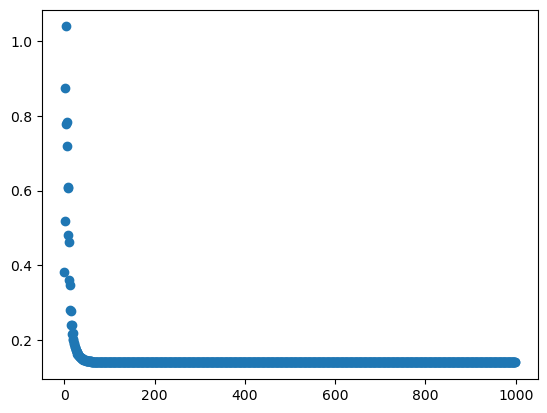

In [35]:
# Plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list)), J_list)
plt.show()

In [36]:
# Keep playing around with gradient descent until you have a good
# learning curve in the plot above (something that appears to flatten out).
# Then answer the questions below. 

# What was your initial choice for alpha?  Your final choice?  How did
# you arrive at these choices?
#
# My initial choice was 0.1. This was too slow, so I increased the value until the learning curve was not convergent anymore.
#
# How many iterations of gradient descent did you need until convergence?
#
# I did 1000 iterations.
#
# What was your final vector of weights? (W_manual)
#
# My final matrix of weights was: 
# [[-5.37001628 -5.52698743  6.62043993 -8.19662318  9.00732921]
# [ 6.23184421  0.21816364 -0.27739485  0.43609511 -0.20017278]
# [-0.86182794  5.30882379 -6.34304509  7.76052807 -8.80715643]]
#
# What was your final cost of these weights? (W_manual_cost)
#
# My final cost was 0.13907632404119077.
#
# What was your final vector of weights from Part A? (W_direct)
#
# My final matrix of weights from Part A was:
# [[-5.38339476 -5.53463536  6.62970227 -8.20801772  9.01979365]
#  [ 6.23967238  0.22115131 -0.28100667  0.44056582 -0.20498942]
#  [-0.85627762  5.31348405 -6.3486956   7.76745191 -8.81480423]]
#
# What cost of these weights? (W_direct_cost)
#
# The cost of these weights was 0.13907622356527163.
#
# How close are your weights from Part B to the "correct" weights from Part A?
#
# They are very close. The difference between these weights is very small.
#
#


In [37]:
# Write code here to compute the accuracy of the new model (the one you just trained)
# on the training and testing data sets.  
# Save these values to two variables called train_acc_partB and test_acc_partB.

# YOUR CODE HERE

train_acc_partB = compute_accuracy(X_train, y_train, W_manual)
test_acc_partB = compute_accuracy(X_test, y_test, W_manual)

print(train_acc_partB)  
print(test_acc_partB)  

0.94
0.91


In [38]:
## QUESTION:

# How does the accuracy of the model you created by hand in Part B compare to 
# the accuracy of the model from Part A created by scikit-learn?

# ANSWER:
# The accuracy in Part B is exactly the same as the accuracy of the model created by scikit-learn.
#

## Part C

Now, you will adjust your cost function to add in **regularization**.

Recall that in regularization, we would like to ensure that our parameters for our model are small, because this
tends to reduce the chance of overfitting.  Here, this means we want our entries in our $W$ matrix to be small.

To make this happen, we change our cost function from this:

$$J(\boldsymbol{W}) = \frac{1}{m}\sum_{i=1}^m L  \left( 
    \hat{\boldsymbol{y}}^{(i)}, \boldsymbol{y}^{(i)} \right)$$

to this:

$$J(\boldsymbol{W}) = \frac{1}{m}\sum_{i=1}^m L  \left( 
    \hat{\boldsymbol{y}}^{(i)}, \boldsymbol{y}^{(i)} \right) + \dfrac{\lambda}{2m}
\sum_{k=1}^K \sum_{j=1}^n w_{k,j}^2$$

That last term may look a little bit different than in the regularization notebook; it's because now the $W$
parameters are in a matrix and we must sum over all the rows and columns of the matrix.  The effect is still the
same; we want to add up the squared values of all the parameters (in the lecture notebook, $w$ as a vector, so there
was only one summation).

Remember that we must pick a parameter $\lambda$.  This parameter controls the strength of the regularization;
higher values of $\lambda$ will cause stronger regularization (forces the parameters to be smaller).  **For this
project, we will use $\lambda=1$.**

Because we're changing the cost function, the gradient function $J$ also changes.  The change looks like this:

Old formula:

$$\dfrac{\partial}{\partial w_{k,j}} J(\boldsymbol{W}) =  
\frac{1}{m} \sum_{i=1}^m \left( \boldsymbol{\hat{y}}_k^{(i)} - \boldsymbol{y}^{(i)}_k \right)x^{(i)}_j$$

New formula:

Our formula we want is 
$$\dfrac{\partial}{\partial w_{k,j}} J(\boldsymbol{W}) =  
\frac{1}{m} \sum_{i=1}^m \left( \boldsymbol{\hat{y}}_k^{(i)} - \boldsymbol{y}^{(i)}_k \right)x^{(i)}_j + \frac{\lambda}{m}w_{k,j}$$

In [39]:
# First we will have scikit-learn do the regularization for us!
# Run this code:

# Download and install scikit-learn if not already done:
# %pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and train it on our training data:
model = LogisticRegression(random_state=0, fit_intercept=False, multi_class='multinomial').fit(X_train, y_train)

# model.coef_ contains the w vector that this logistic regression model was able to find, so
# we'll treat it as the "best" w and see if we can match it manually.
W_direct_reg = model.coef_

print("W found through scikit-learn:", W_direct_reg)

W found through scikit-learn: [[-1.92702863 -2.36945566  2.77865404 -3.51527955  3.83965533]
 [ 2.75536357 -0.09733869  0.08306797 -0.04882836  0.25881926]
 [-0.82833494  2.46679435 -2.86172201  3.5641079  -4.09847459]]


In [40]:
# Redefine the compute_cost function below to compute the
# total cost over the entire data set X_data and y_data_one_hot,
# given parameters matrix W.
# YOU WILL NOW INCLUDE REGULARIZATION, but this is easy.
# We will simply call compute_cost() from above, and then add in the 
# extra summation over all the entries in W (squared).

def compute_cost_regularization(X_data, y_data_one_hot, W):
    """
    X_data: matrix (m rows, n+1 cols)
    y_data_one_hot: matrix (m rows, K cols)
    W: matrix of weights (K rows, n+1 cols)
    returns: scalar
    """
        
    return compute_cost(X_data, y_data_one_hot, W) + (0.5 / X_data.shape[0]) * np.sum(np.square(W))

    # hint: call compute_cost(X_data, y_data_one_hot, W) and then
    # add in the regularization term.


In [41]:
# Sanity check: compute the cost for W_direct_regularization:

W_direct_reg_cost = compute_cost_regularization(X_train, y_train_one_hot, W_direct_reg)  
# This is the minimum cost we can ever get!  Should be about 0.24649
print(W_direct_reg_cost)

0.24649088188268434


In [42]:
# Redefine the compute_gradient function below to compute
# the complete gradient for the function J(W).  
# YOU WILL NOW INCLUDE REGULARIZATION.
# You can do this any way you want, but the easiest way is to base it off your
# code for compute_gradient(), and make some small changes to add the regularization term.

def compute_gradient_regularization(X_data, y_data_one_hot, W):
    """
    X_data: matrix (m rows, n+1 cols)
    y_data_one_hot: matrix (m rows, K cols)
    W: matrix of weights (K rows, n+1 cols)
    returns: matrix of gradients (K rows, n+1 cols)
    """
    
    return compute_gradient(X_data, y_data_one_hot, W) + (1.0 / X_data.shape[0]) * W
    
    

In [43]:
# Sanity check:

sample_W = np.ones((3, 5))

compute_gradient_regularization(X_train, y_train_one_hot, sample_W)

# Should give you 
#array([[ 0.10958333,  0.10780513, -0.15285789,  0.18096531, -0.17689248],
#       [-0.11166667,  0.02918684,  0.02397548,  0.00135844, -0.06637009],
#       [ 0.00583333, -0.13324198,  0.13263241, -0.17857375,  0.24701257]])

array([[ 0.10958333,  0.10780513, -0.15285789,  0.18096531, -0.17689248],
       [-0.11166667,  0.02918684,  0.02397548,  0.00135844, -0.06637009],
       [ 0.00583333, -0.13324198,  0.13263241, -0.17857375,  0.24701257]])

In [44]:
# Write code here to perform gradient descent, using your
# functions above, including regularization.  You should use three new variables in your
# code:
# - W_manual_reg: which is the vector of weights that gradient
#   descent is designed to find:
# - W_manual_reg_cost, which is the cost of these weights,
# - J_list, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:
W_manual_reg = np.zeros((3, 5))  
W_manual_reg_cost = 0
J_list = []

ALPHA = 11

for i in range(1000):
    W_manual_reg -= ALPHA * compute_gradient_regularization(X_train, y_train_one_hot, W_manual_reg)
    W_manual_reg_cost = compute_cost_regularization(X_train, y_train_one_hot, W_manual_reg)
    J_list.append(W_manual_reg_cost)


print("Final w:", W_manual_reg)
print("Final cost:", W_manual_reg_cost)

Final w: [[-1.92706945 -2.36950808  2.77866101 -3.51529645  3.83968888]
 [ 2.75539524 -0.09733851  0.08306567 -0.04883625  0.25881498]
 [-0.82832578  2.46684659 -2.86172668  3.5641327  -4.09850386]]
Final cost: 0.24649088175920106


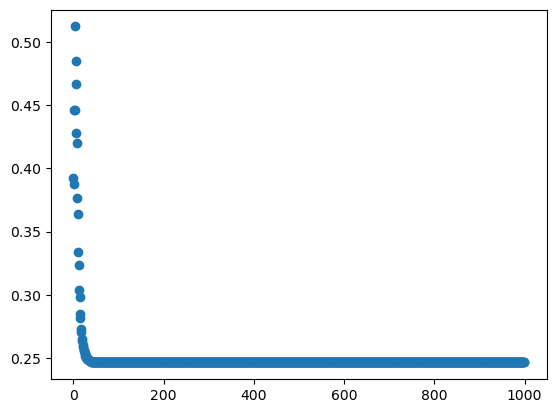

In [45]:
# Plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list)), J_list)
plt.show()

In [46]:
# Write code here to compute the accuracy of the new model (the one you just trained)
# on the training and testing data sets.  
# Save these values to two variables called train_acc_partC and test_acc_partC.

# YOUR CODE HERE

train_acc_partC = compute_accuracy(X_train, y_train, W_manual_reg)
test_acc_partC = compute_accuracy(X_test, y_test, W_manual_reg)

print(train_acc_partC)  
print(test_acc_partC)  

# You should end up with a **higher** testing accuracy in part C than in parts A and B!
# This illustrates that regularization has helped us avoid overfitting, because the training
# accuracy should be identical in A/B/C (or almost identical), but test accuracy will be 
# higher in C.

0.94
0.92


In [47]:
# Final checkpoint

# All of these should print OK and match up with what you have above:

print("Part A")
print("Weights:", W_direct)
print("Cost:", W_direct_cost)
print("Training accuracy:", train_acc_partA)
print("Testing accuracy:", test_acc_partA)
print()
print("Part B")
print("Weights:", W_manual)
print("Cost:", W_manual_cost)
print("Training accuracy:", train_acc_partB)
print("Testing accuracy:", test_acc_partB)
print()
print("Part C")
print("Weights:", W_manual_reg)
print("Cost:", W_manual_reg_cost)
print("Training accuracy:", train_acc_partC)
print("Testing accuracy:", test_acc_partC)
print()


Part A
Weights: [[-5.38339476 -5.53463536  6.62970227 -8.20801772  9.01979365]
 [ 6.23967238  0.22115131 -0.28100667  0.44056582 -0.20498942]
 [-0.85627762  5.31348405 -6.3486956   7.76745191 -8.81480423]]
Cost: 0.13907622356527163
Training accuracy: 0.94
Testing accuracy: 0.91

Part B
Weights: [[-5.37001628 -5.52698743  6.62043993 -8.19662318  9.00732921]
 [ 6.23184421  0.21816364 -0.27739485  0.43609511 -0.20017278]
 [-0.86182794  5.30882379 -6.34304509  7.76052807 -8.80715643]]
Cost: 0.13907632404119077
Training accuracy: 0.94
Testing accuracy: 0.91

Part C
Weights: [[-1.92706945 -2.36950808  2.77866101 -3.51529645  3.83968888]
 [ 2.75539524 -0.09733851  0.08306567 -0.04883625  0.25881498]
 [-0.82832578  2.46684659 -2.86172668  3.5641327  -4.09850386]]
Cost: 0.24649088175920106
Training accuracy: 0.94
Testing accuracy: 0.92

